In [4]:
import os
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load model

In [98]:
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import load_model

METADATA = 'metadata.npy'
SHAPE = (300, 500, 3)
metadata = np.load(METADATA).item()
base_model = VGG16(include_top=False, input_shape=SHAPE)
base_model.layers.pop()
model = load_model('model1.h5')

# Test img

In [81]:
from keras import backend as K

files = [os.path.join('data/test_stg2/', f) for f in os.listdir('data/test_stg2/')]
labels_dict = {np.argmax(metadata[i]):i for i in metadata.keys()}

In [107]:
model_heatmap = load_model('model1.h5')
model_heatmap.pop()
model_heatmap.pop()
model_heatmap.compile('adam', 'mse')

[('DOL', 0.0006689938),
 ('YFT', 0.0044261841),
 ('NoF', 0.0016460677),
 ('BET', 0.0055989791),
 ('LAG', 0.00082992698),
 ('OTHER', 0.0024279582),
 ('ALB', 0.98359329),
 ('SHARK', 0.0008085618)]


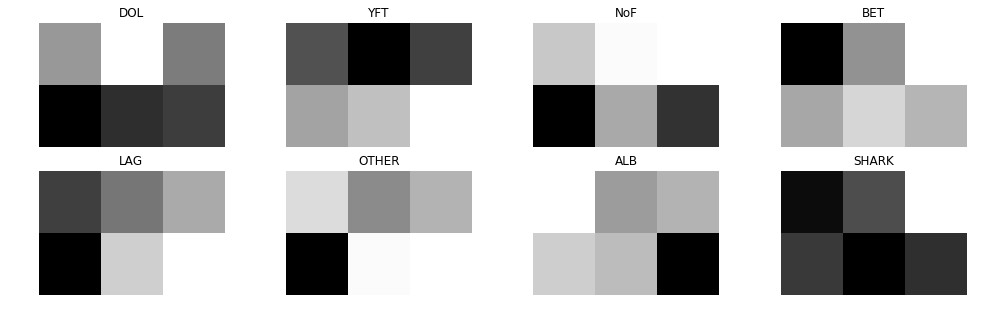

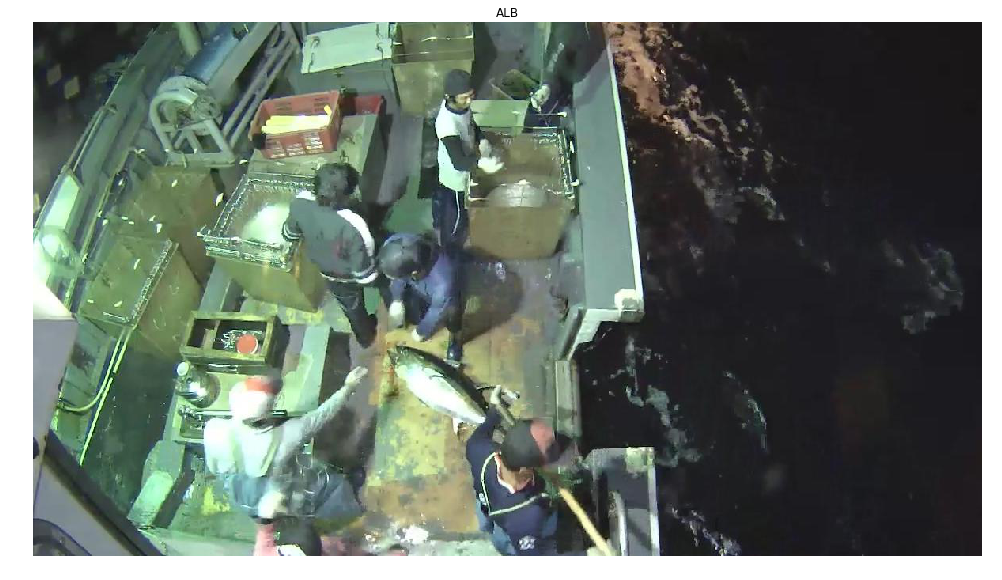

In [158]:
import cv2
from PIL import Image
from pprint import pprint

file = random.choice(files)
img = Image.open(file)
img = img.resize(SHAPE[:2][::-1])
img = np.asarray(img, dtype=np.float32)
img = preprocess_input(img.reshape([-1, *SHAPE]))

# Get pred
pp_img = base_model.predict(img)
y = model.predict(pp_img)
label = labels_dict[np.argmax(y)]
info = [(labels_dict[i],j) for i,j in enumerate(y[0])]
pprint(info)

# Heatmap
heatmap  = model_heatmap.predict(pp_img)[0]
plt.figure(figsize=(17,5))
for i in range(heatmap.shape[2]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(heatmap[:,:,i], cmap=plt.cm.binary)
    plt.title(labels_dict[i])
    plt.axis('off')
plt.show()

# Show image
img_show = plt.imread(file)
plt.figure(figsize=(17,10))
plt.title(label)
plt.imshow(img_show)
plt.axis('off')
plt.show()